In [1]:
import glob
import pandas as pd
import os
import sklearn.datasets as skdata
import numpy as np
#import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import confusion_matrix
#%matplotlib inline

In [11]:
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection

In [2]:
from sklearn.metrics import f1_score

In [3]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [4]:
# Solamente uso las columnas  x="high" y="nombre del archivo". Ejm

In [5]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [6]:
#las dimensiones son 1249 (cada compañía)
print(labels[0])

Date


In [7]:
#tomo todos los elementos que no tengan celdas vacías

In [8]:
n_max=1200#number of files taken
n_data=120# last days taken
#n_max=len(files)
X=[]
Y=[]
date=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>119):
            X=np.append(X,data[labels[2]][-n_data:])#toma todos los datos con high
            if(cnt==0):
                date=np.append(date,data[labels[0]][-n_data:])#toma todos los dates
            cnt+=1
X=(X.reshape(cnt,n_data)).transpose()
#las categorías son los meses del año
for i in range(len(date)):
    for j in range(5,12):
        if("-0{}-".format(j) in date[i]):
            Y=np.append(Y,j)
        elif("-{}-".format(j) in date[i]):
            Y=np.append(Y,j)
print(np.shape(X))
print(np.shape(Y))

(120, 1090)
(120,)


In [20]:
# las categorías que esperamos obtener son los meses del año en el orden en que aparece el array Y.
# En este caso tenemos 7 meses:

In [9]:
print(len(date))
print((Y))

120
[ 5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11.]


In [12]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train.reshape(-1, 1))
#y_test = scaler.transform(y_test.reshape(-1, 1))
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))

(60, 1090)
(60, 1090)
(60,)


In [53]:
#Number of neurons
n=np.arange(1,8)
#loss
loss=[]
#f1_score
f1_s_train=[]
f1_s_test=[]

In [29]:
# para una capa

In [30]:
for i in n:
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(i), 
                                           max_iter=200)
    mlp.fit(x_train, y_train)
    loss=np.append(loss,mlp.loss_)
    f1_s_train=np.append(f1_s_train,sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
    f1_s_test=np.append(f1_s_test,sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
    #print('Loss', mlp.loss_)#entropía relativa, divergencia

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


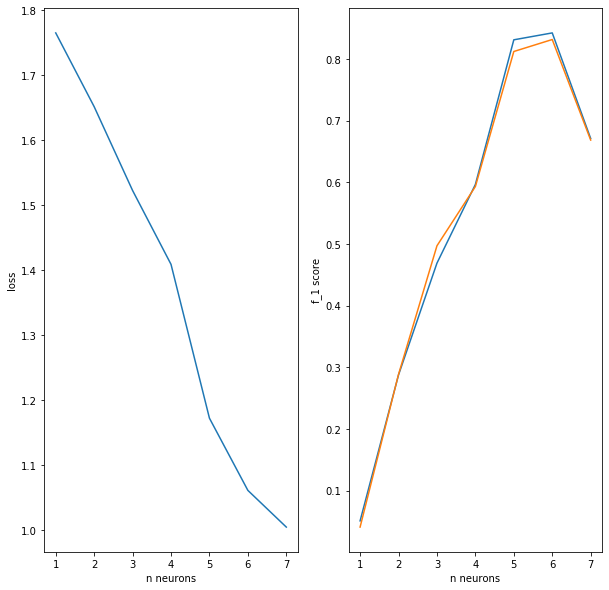

In [31]:
plt.figure(1,figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(n,loss)
plt.xlabel('n neurons')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(n,f1_s_train,label="train")
plt.plot(n,f1_s_test,label="test")
plt.xlabel('n neurons')
plt.ylabel('f_1 score')
plt.savefig("loss_f1.png")

In [22]:
# dos capa

In [58]:
#Number of neurons
n1=np.arange(1,5)
n2=np.arange(2,8)
#loss
loss=[]
#f1_score
f1_s_train=np.zeros((len(n1)+1,len(n2)+1))
f1_s_test=np.zeros((len(n1)+1,len(n2)+1))

In [48]:
#np.shape(f1_s_train)

In [62]:
for i in n1:
    for j in n2:
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                               hidden_layer_sizes=(i,j), 
                                               max_iter=200)
        mlp.fit(x_train, y_train)
        loss=np.append(loss,mlp.loss_)
        f1_s_train[i-1,j-2]=sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro')
        f1_s_test[i-1,j-2]=sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro')
        #print('Loss', mlp.loss_)#entropía relativa, divergencia

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [84]:
# Regresión logísitica utilizando l1

In [106]:
# Turn up tolerance for faster convergence
train_samples = int(np.shape(Y)[0]*0.5)
f1_av_1=[]
#regresión logística sobre los dígitos
for i in np.log(np.arange(np.e,1000,10)):
    clf = LogisticRegression(
        C=i, penalty='l1', solver='saga', tol=0.1)
        #C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)#,multi_class='multinomial'
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    f1_av_1=np.append(f1_av_1,f1_score(y_test,y_pred, average='weighted'))

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/a

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/a

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/john/a

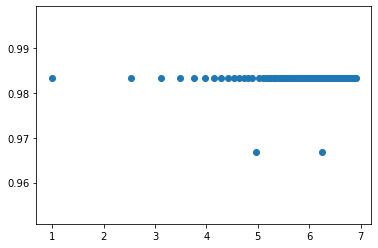

In [108]:
plt.scatter(np.log(np.arange(np.e,1000,10)),f1_av_1,label="f1")
#plt.scatter(np.arange(1,10),f1_av_1,label="f1")

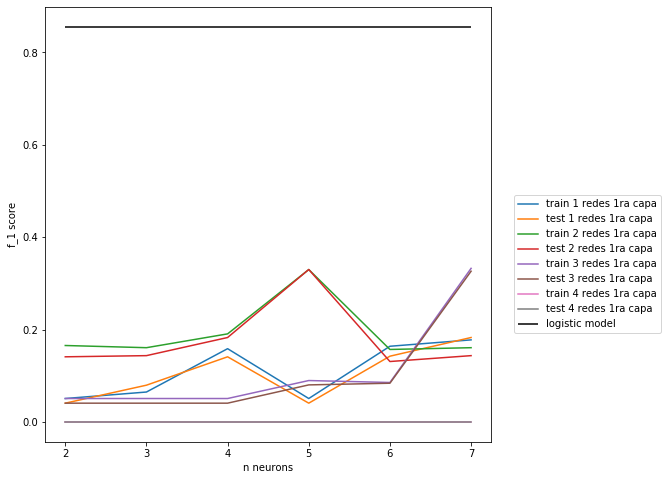

In [96]:
for i in n1:
#for i in range(3,5):
    plt.figure(1,figsize = (8,8))
    #plt.subplot(1,2,1)
    #plt.plot(n,loss)
    plt.xlabel('n neurons')
    plt.ylabel('loss')
    #plt.subplot(1,7,i)
    plt.plot(n2,f1_s_train[i,:6],label="train {} redes 1ra capa".format(i))
    plt.plot(n2,f1_s_test[i,:6],label="test {} redes 1ra capa".format(i))
    plt.xlabel('n neurons')
    plt.ylabel('f_1 score')
plt.hlines(0.85548043,min(n2),max(n2),label="logistic model")
plt.legend(loc=(1.05,0.25))
    #plt.savefig("loss_f1.png")

# Discusión

* En mi caso los resultados no fueron tan buenos cuando se con las redes neuronales que al aplicar la regresión logística.
* 